In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Mall_Customers.csv to Mall_Customers.csv
User uploaded file "Mall_Customers.csv" with length 3981 bytes


In [ ]:
!ls -l

total 8
-rw-r--r-- 1 root root 3981 Feb 28 14:50 Mall_Customers.csv
drwxr-xr-x 1 root root 4096 Feb 18 14:33 sample_data


In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:

#Statisical info 
df.describe()

#datatype info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


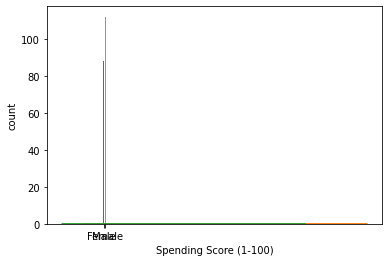

In [ ]:
#Exploratory Data Analysis
sns.countplot(df['Gender'])   # categorical data visualization
sns.distplot(df['Age'])           # distribution plot in histogram
sns.distplot(df['Annual Income (k$)'])
sns.distplot(df['Spending Score (1-100)'])


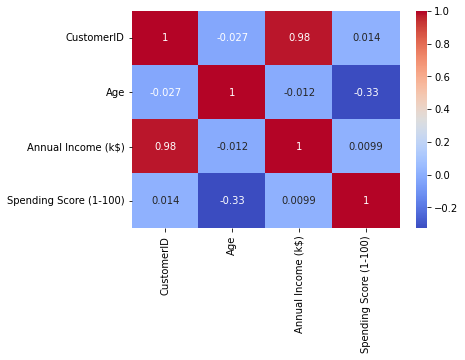

In [ ]:
#Correlation Matrix
corr = df.corr()
sns.heatmap(corr, annot =True,cmap = 'coolwarm')




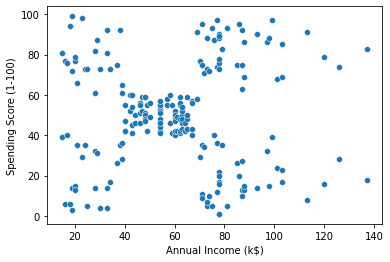

In [ ]:
#Cluster on two features
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

sns.scatterplot(df1['Annual Income (k$)'],df1['Spending Score (1-100)'])


AttributeError: ignored

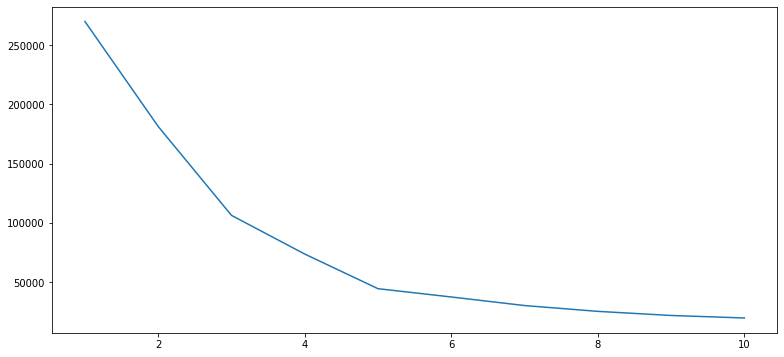

In [ ]:
#KMeansclustering  - training

from sklearn.cluster import KMeans
errors = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i)   # no of cluster for model
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)  # Kmeans inertia is just loss function

#Plot the results for elbow method
plt.figure(figsize = (13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),linewidth = 3, color = 'red', markers=8)
plt.xlabel('no of clusters')
plt.ylabel("Wcss")             # loss function output
plt.xticks(np.arange(1,11,1))
plt.show()


In [ ]:
#Fitting
km = KMeans(n_clusters = 5)
km.fit(df1)
y = km.predict(df1)
df1['label'] = y
df1.head()


,Annual Income (k$),Spending Score (1-100),label
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4


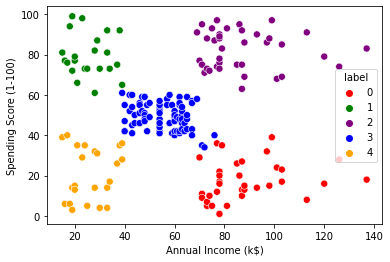

In [ ]:
sns.scatterplot(x= 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df1, hue = 'label',s=50,palette = ['red', 'green','purple','blue','orange'])

In [ ]:
#Cluster on three features

df2 = df[['Annual Income (k$)', 'Spending Score (1-100)','Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


AttributeError: ignored

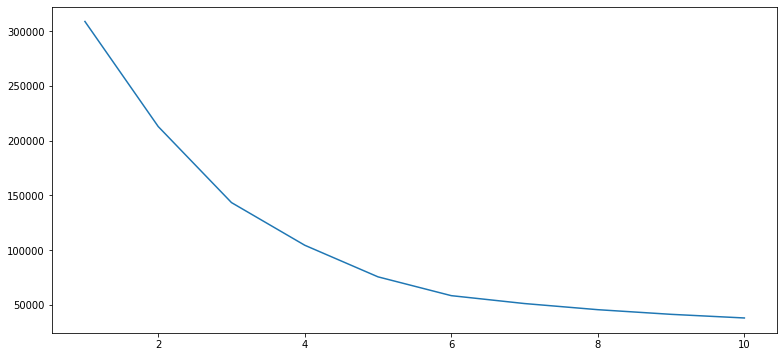

In [ ]:


#KMeansclustering  - training

from sklearn.cluster import KMeans
errors = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i)   # no of cluster for model
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)  # Kmeans inertia is just loss function

#Plot the results for elbow method
plt.figure(figsize = (13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),linewidth = 3, color = 'red', markers='8')
plt.xlabel('no of clusters')
plt.ylabel("Wcss")             # loss function output
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
#Fitting
km = KMeans(n_clusters = 5)
km.fit(df2)
y = km.predict(df2)
df2['label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,label
0,15,39,19,2
1,15,81,21,3
2,16,6,20,2
3,16,77,23,3
4,17,40,31,2


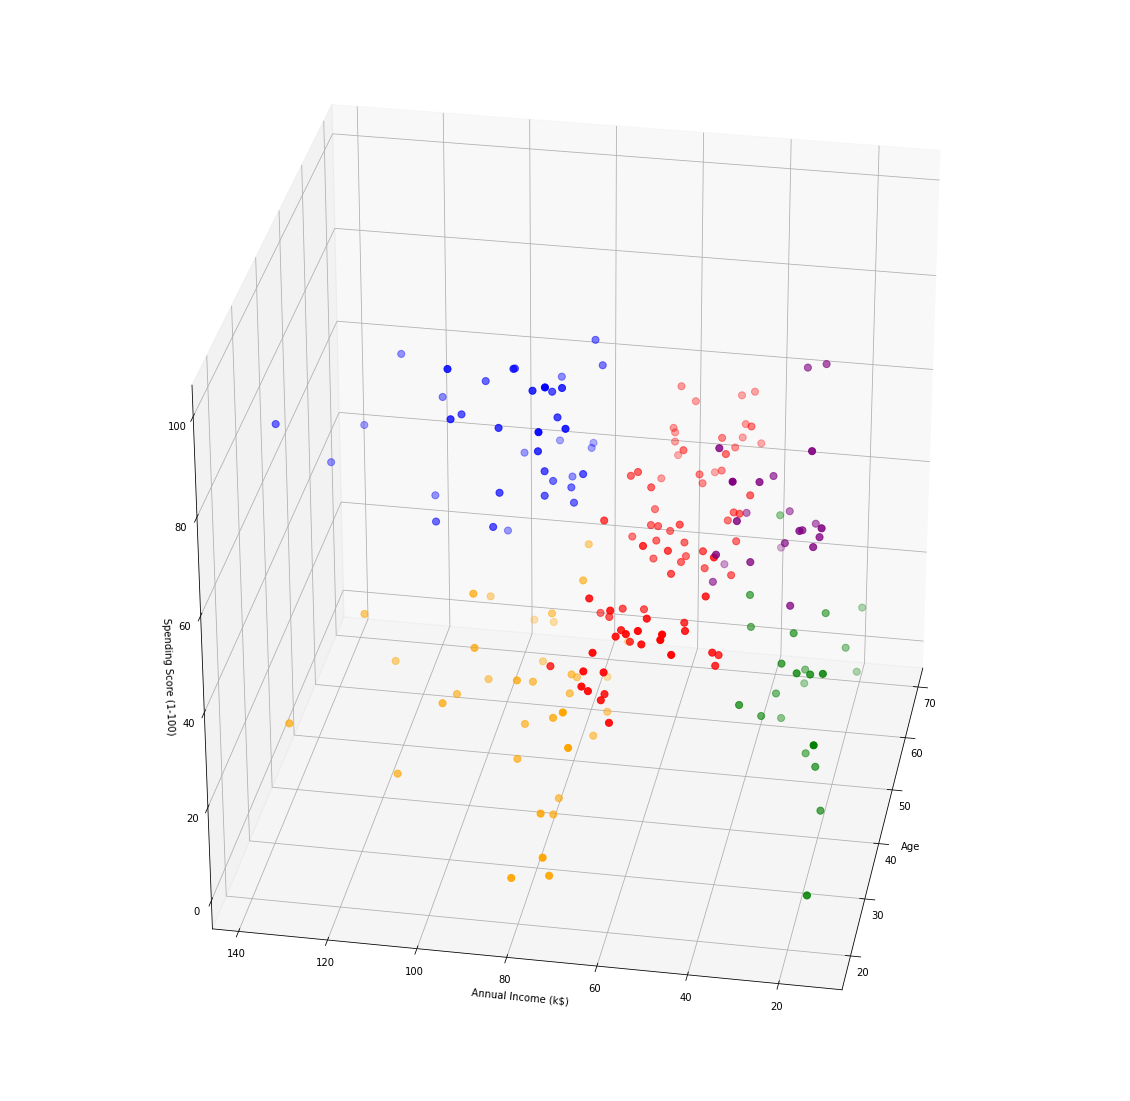

In [ ]:
#plotting for 3d
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111,projection = '3d')

ax.scatter(df2['Age'] [df2['label'] == 0],df2['Annual Income (k$)'] [df2['label'] == 0],df2['Spending Score (1-100)'] [df2['label'] == 0],c = 'red', s = 50)
ax.scatter(df2['Age'] [df2['label'] == 1],df2['Annual Income (k$)'] [df2['label'] == 1],df2['Spending Score (1-100)'] [df2['label'] == 1],c = 'blue', s = 50)
ax.scatter(df2['Age'] [df2['label'] == 2],df2['Annual Income (k$)'] [df2['label'] == 2],df2['Spending Score (1-100)'] [df2['label'] == 2],c = 'green', s = 50)
ax.scatter(df2['Age'] [df2['label'] == 3],df2['Annual Income (k$)'] [df2['label'] == 3],df2['Spending Score (1-100)'] [df2['label'] == 3],c = 'purple', s = 50)
ax.scatter(df2['Age'] [df2['label'] == 4],df2['Annual Income (k$)'] [df2['label'] == 4],df2['Spending Score (1-100)'] [df2['label'] == 4],c = 'orange', s = 50)

ax.view_init(30,190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()
